In [7]:
#Importing essential libraries and function
import pandas as pd
import numpy as np
import keras
import re
import nltk
from nltk.corpus import stopwords
from numpy import array

from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [15]:
data_comment = pd.read_csv("test.csv")
data_label = pd.read_csv("test_labels.csv")
data = pd.merge(data_comment, data_label, on='id')

In [16]:
data.shape

(153164, 8)

In [17]:
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [18]:
data = data.drop("severe_toxic", axis=1)
data = data.drop("obscene", axis=1)
data = data.drop("threat", axis=1)
data = data.drop("insult", axis=1)
data = data.drop("identity_hate", axis=1)

In [19]:
data.rename(columns={'comment_text': 'comment'}, inplace=True)
data['toxic'] = data['toxic'].replace(-1, 1)

In [21]:
data = data.drop("id", axis=1)

In [22]:
data.head(5)

,comment,toxic
0,Yo bitch Ja Rule is more succesful then you'll...,1
1,== From RfC == \n\n The title is fine as it is...,1
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",1
3,":If you have a look back at the source, the in...",1
4,I don't anonymously edit articles at all.,1


In [23]:
data.isnull().values.any()

False

<AxesSubplot:xlabel='toxic', ylabel='count'>

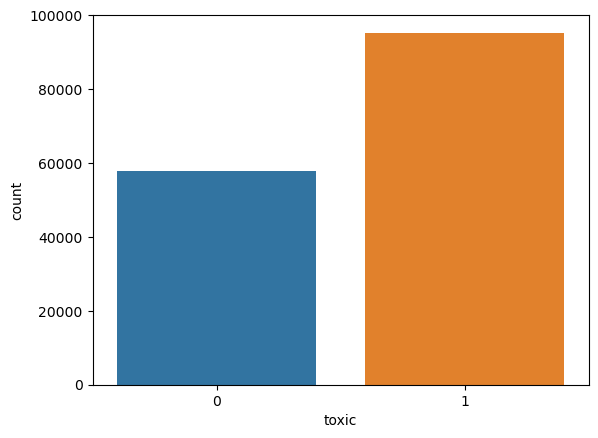

In [25]:
import seaborn as sns
sns.countplot(x='toxic', data=data)